# Applying Advanced Transformations


## Task
Your task is two-fold:

I. Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
- Hero (Just the name of the Hero)
- Publisher
- Gender
- Eye color
- Race
- Hair color
- Height (numeric)
- Skin color
- Alignment
- Weight (numeric)
- Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
  - Agility
  - Flight
  - Superspeed
  - etc.
- Hint: There is a space in "100 kg" or "52.5 cm"



II. Use your combined DataFrame to answer the following questions.

1. Compare the average weight of super powers who have Super Speed to those who do not.
2. What is the average height of heroes for each publisher?


### Import Libraries

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

### Upload Data

In [2]:
df_hero = pd.read_csv("Data\superhero_info - superhero_info.csv")
df_hero.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
df_power = pd.read_csv("Data\superhero_powers - superhero_powers.csv")
df_power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [4]:
df_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [5]:
df_hero.duplicated().sum()

0

In [6]:
## save the 2 new columns into the dataframe
df_hero[['Hero','Publisher']] = df_hero['Hero|Publisher'].str.split('|',expand=True)
df_hero.head(4)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics


In [7]:
#dropping Hero/Publisher column
df_hero.drop(columns='Hero|Publisher', inplace=True)

In [8]:
#checking Measurement type
test_meas = df_hero.loc[0,'Measurements']
test_meas

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [9]:
type(test_meas)

str

In [10]:
#replace single quotes with double quotes
df_hero['Measurements'] = df_hero['Measurements'].str.replace("'",'"')
df_hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{""Height"": ""203.0 cm"", ""Weight"": ""441.0 kg""}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{""Height"": ""191.0 cm"", ""Weight"": ""65.0 kg""}",Abe Sapien,Dark Horse Comics


In [11]:
#convert Measurements column to a dict by using json.loads
df_hero['Measurements'] = df_hero['Measurements'].apply(json.loads)

In [12]:
#checking Measurement type
test_meas = df_hero.loc[0,'Measurements']
type(test_meas)

dict

In [13]:
df_hero['Measurements'].apply(pd.Series)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [14]:
#adding the two columns to dataframe
df_hero = pd.concat([df_hero,df_hero['Measurements'].apply(pd.Series)],axis=1)

In [15]:
#drop the Measurements Column
df_hero.drop(columns='Measurements', inplace=True)

In [16]:
df_hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [17]:
#remove the cm and kg from Height and Weight columns
df_hero['Height'] = df_hero['Height'].str.replace(" cm",'')
df_hero['Weight'] = df_hero['Weight'].str.replace(" kg",'')

In [18]:
df_hero.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [19]:
#correcting datatypes
df_hero['Height'] = df_hero['Height'].astype(float)

In [20]:
#correcting datatypes
df_hero['Weight'] = df_hero['Weight'].astype(float)

In [21]:
#verifying changes were made
df_hero['Weight'].dtype

dtype('float64')

In [22]:
test_powers = df_power.loc[0,'Powers']
test_powers

'Agility,Super Strength,Stamina,Super Speed'

In [23]:
type(test_powers)

str

In [24]:
p_test = test_powers.replace("'",'"')
p_test

'Agility,Super Strength,Stamina,Super Speed'

In [25]:
type(p_test)

str

In [26]:
p_test = test_powers.replace(",",'","')
p_test

'Agility","Super Strength","Stamina","Super Speed'

In [27]:
p_test = '["' + p_test + '"]'
p_test

'["Agility","Super Strength","Stamina","Super Speed"]'

In [28]:
type(p_test)


str

In [29]:
print(json.loads(p_test))
type(json.loads(p_test))

['Agility', 'Super Strength', 'Stamina', 'Super Speed']


list

In [30]:
#constructing a list file with double quotes
df_power['Powers_split'] = df_power['Powers'].str.replace(",",'","')
df_power['Powers_split'] = '["' + df_power['Powers_split'] + '"]'

In [31]:
df_power['Powers_split'].head()

0    ["Agility","Super Strength","Stamina","Super S...
1    ["Accelerated Healing","Durability","Longevity...
2    ["Agility","Accelerated Healing","Cold Resista...
3                               ["Lantern Power Ring"]
4    ["Accelerated Healing","Intelligence","Super S...
Name: Powers_split, dtype: object

In [32]:
#apply json.loads
df_power['Powers_split'] = df_power['Powers_split'].apply(json.loads)
df_power['Powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: Powers_split, dtype: object

In [33]:
df_power['Powers_split'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [34]:
exploded = df_power.explode('Powers_split')
#exploded[['hero_names','Powers_split','Powers']]
exploded.head()

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [35]:
#remove nulls
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [36]:
#one hot encoding
for col in cols_to_make:
  df_power[col] = df_power['Powers'].str.contains(col)
df_power.head()

C:\Users\Daisy\AppData\Local\Temp\ipykernel_17452\4230406823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_power[col] = df_power['Powers'].str.contains(col)
C:\Users\Daisy\AppData\Local\Temp\ipykernel_17452\4230406823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_power[col] = df_power['Powers'].str.contains(col)
C:\Users\Daisy\AppData\Local\Temp\ipykernel_17452\4230406823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_power.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#drop the Powers and Powers_split Column
df_power.drop(columns=['Powers','Powers_split'], inplace=True)

### Merge files

In [39]:
#merge with our 2 dataframes on name column
df = pd.merge(df_power, df_hero, left_on='hero_names', right_on='Hero', how='inner')
print(df.shape)
df.head(3)

(463, 178)


,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,A-Bomb,False,True,True,False,True,True,True,True,True,...,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Abe Sapien,True,True,True,False,True,True,True,False,False,...,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Abin Sur,False,False,False,False,False,False,False,False,False,...,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0


In [40]:
#drop the Hero Column
df.drop(columns='Hero', inplace=True)

### Average Weight of those who have Super Speed vs those who don't.

In [75]:
super_speed = df.groupby('Super Speed')['Weight'].mean().sort_values().round(2)
super_speed

Super Speed
False    101.77
True     129.40
Name: Weight, dtype: float64

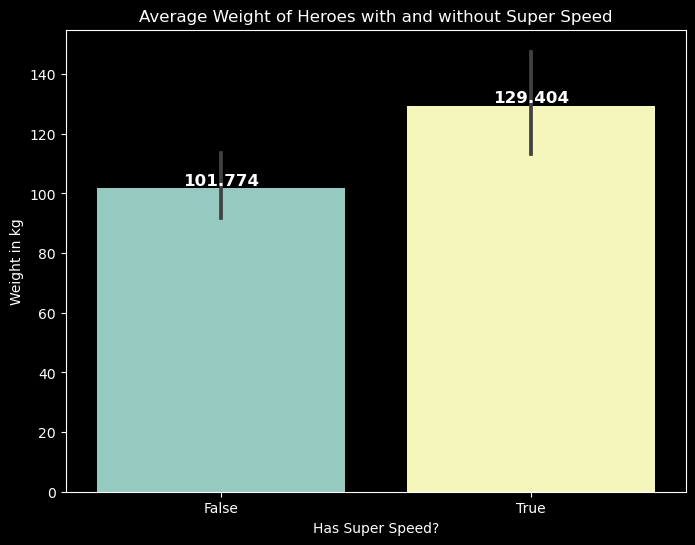

In [93]:
#setting matplotlib style
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(data = df, x = 'Super Speed', y = 'Weight')
plt.bar_label(ax.containers[0],size=12, color='white', fontweight='bold')

plt.title('Average Weight of Heroes with and without Super Speed')
plt.ylabel('Weight in kg')
plt.xlabel('Has Super Speed?');

### Average height of heroes for each Publisher

In [94]:
publish = df.groupby('Publisher')['Height'].mean().sort_values().round(2)
publish

Publisher
George Lucas         159.60
Shueisha             171.50
Dark Horse Comics    176.91
Unknown              178.00
Team Epic TV         180.75
Star Trek            181.50
DC Comics            181.92
Marvel Comics        191.55
Image Comics         211.00
Name: Height, dtype: float64

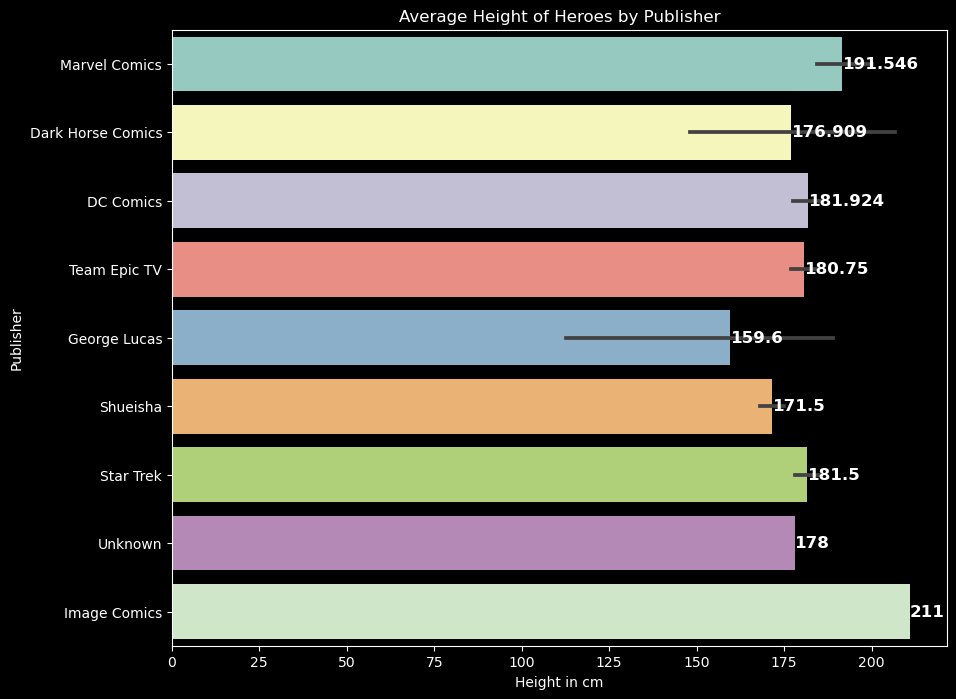

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data = df, x = 'Height', y = 'Publisher')
plt.bar_label(ax.containers[0],size=12, color='white', fontweight='bold')

plt.title('Average Height of Heroes by Publisher')
plt.xlabel('Height in cm')
plt.ylabel('Publisher');